In [1]:
#importing dependencies (keras)
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#importing matplotlib to show images
import matplotlib.pyplot as plt

In [3]:
#initialize training and test vars
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Printing the shapes of the different train and test variables
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)

The shape of X_train is  (60000, 28, 28)
The shape of X_test is  (10000, 28, 28)
The shape of y_train is  (60000,)
The shape of y_test is  (10000,)


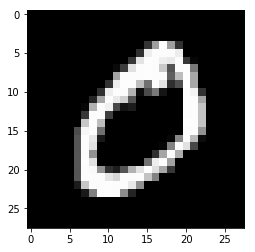

In [5]:
#showing the image
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train/=255
X_test/=255

In [8]:
print(y_test[0])

7


<h2 style="text-align: center;">Here is an example of a 3 by 3 feature detector with a stride of 1 creating a feature map</h2>
<img src="https://camo.githubusercontent.com/3309220c48ab22c9a5dfe7656c3f1639b6b1755d/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f6e3134713930677a386138726278622f32645f636f6e766f6c7574696f6e2e706e673f7261773d31">

In [9]:
#initializing the model
model= Sequential()
#adding a convolutional layer with 32 feature detectors
#the padding of same will not reduce the size of the image
#the relu activation function will turn any negative values into 0
#he input is a 28 by 28 image which has one channel
#remember that the channel would be 3 for colored images
model.add(Conv2D(32, kernel_size=(5, 5),padding='same', activation='relu', input_shape=(28, 28, 1)))

<h2 style="text-align: center;">This is an example of max pooling with a stride of 2 and kernel size of 2 by 2</h2>
<img src="https://qph.ec.quoracdn.net/main-qimg-8afedfb2f82f279781bfefa269bc6a90">

In [10]:
#first maxpooling layer
#this will reduce each of the 32 feature maps to a 14 by 14 image
#the result will only have the highest value in terms of 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [11]:
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

<h2 style="text-align: center;">This is a visualization of flattening the matrix and putting the column vector into a fully connected layer <small>(Pretty much just an ANN)</small></h2>
<br/>
<img src="http://labs.septeni-technology.jp/wp-content/uploads/2017/09/Flatten-FC-Layer.png">

In [12]:
#Flattening the matrix into a column vector
model.add(Flatten())
#feeding the column vector into an artificial neural net
model.add(Dense(128, activation='relu'))
#adding dropout to prevent overfitting
model.add(Dropout(0.25))
#output layer which has the softmax optimization function to give probability
#in the form of a vector
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

<h2 style="text-align: center;">Example of a ANN and ANN with dropout</h2>
<br/>
<img src="https://cdn-images-1.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png">

In [13]:
#changing the labels from ints to an array 
#example:
#7 = [0,0,0,0,0,0,0,1,0,0]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
#feel free to change the number of epochs and batch size
#Your results will be better if you add more epochs!
model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test))

In [16]:
y_pred = model.predict(X_test)
print(y_pred)
model.evaluate(X_test, y_test)

[[3.6745469e-08 1.0730119e-07 2.7921217e-07 ... 9.9999845e-01
  7.1891701e-09 1.2902669e-07]
 [6.5275439e-05 9.8295395e-06 9.9983454e-01 ... 4.1701256e-12
  8.8903369e-05 1.6902924e-10]
 [3.9570718e-06 9.9844956e-01 1.1636932e-04 ... 1.6116886e-04
  1.5454652e-05 5.8354262e-06]
 ...
 [2.1699782e-10 5.9706089e-08 1.1837593e-10 ... 5.1026774e-08
  5.6012749e-07 1.5561925e-07]
 [1.0142815e-04 4.7066910e-09 4.5350848e-08 ... 4.6313883e-07
  7.3853778e-03 2.6419576e-07]
 [1.3659903e-05 9.2915092e-10 6.4323160e-08 ... 4.3520337e-11
  1.6820043e-06 9.4519703e-10]]
10000/10000 [==============================] - 10s     

[0.05606923617864959, 0.9823]

In [24]:
#importing coremltools to save as .mlmodel
import coremltools

#converting to .mlmodel
input_name = 'image'
coreml_model = coremltools.converters.keras.convert(model, image_input_names = 'image', input_names='image', output_names='prediction', class_labels=[0,1,2,3,4,5,6,7,8,9])
coreml_model.save('mnist.mlmodel')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x11b3bcb70>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x11668a5f8>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x12ca38f28>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x106505668>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x11f2ae128>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x12ca38ef0>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x11f1486d8>
7 : flatten_1, <keras.layers.core.Flatten object at 0x11f162390>
8 : dense_1, <keras.layers.core.Dense object at 0x11f162320>
9 : dense_1__activation__, <keras.layers.core.Activation object at 0x12ca38e80>
10 : dense_2, <keras.layers.core.Dense object at 0x11f175da0>
11 : dense_2__activation__, <keras.layers.core.Activation object at 0x12ca38f60>
